In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.svm import NuSVR
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import BayesianRidge

In [5]:
!pip install xgboost

In [7]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.4 MB 890.4 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.4 MB 1.3 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.4 MB 1.8 MB/s eta 0:00:01
   --------- ------------------------------ 0.4/1.4 MB 1.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.6/1.4 MB 2.4 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.4 MB 2.6 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.4 MB 2.7 MB/s eta 0:00:01
   ----------------------------- ---------- 1.1/1.4 MB 2.9 MB/s eta 0:00:01
   ---------------------------------- ----- 1.2/1.4 MB 2.9 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 3.0 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.0 MB/s eta 0:00:00


In [8]:
!pip install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 245.8 kB/s eta 0:06:54
   ---------------------------------------- 0.1/101.7 MB 326.8 kB/s eta 0:05:12
   ---------------------------------------- 0.1/101.7 MB 561.1 kB/s eta 0:03:02
   ---------------------------------------- 0.2/101.7 MB 846.9 kB/s eta 0:02:00
   ---------------------------------------- 0.3/101.7 MB 981.5 kB/s eta 0:01:44
   ---------------------------------------- 0.4/101.7 MB 1.0 MB/s eta 0:01:39
   ---------------------------------------- 0.5/101.7 MB 1.1 MB/s eta 0:01:30
   ---------------------------------------- 0.5/101.7 MB 1.2 MB/s eta 0:01:25
   ---------------------------------------- 0.5/101.7 MB 1.2 MB/s eta 0:01:25
   ---------------------------------------- 0.6/101.7 MB 1.2 MB/s eta 0:01:

In [9]:
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
from sklearn.metrics import mean_squared_error, r2_score
import math

In [34]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
file_path = 'Predicted_AlGr1.5_Compiled data.xlsx'
data = pd.read_excel(file_path)

In [11]:
X = data[["Time (Minutes)", "Predicted Current (microAmperes)", "Electric Field Strength"]]
y = data["Current Density"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [52]:
rf_tuned = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, n_iter=10, cv=3, n_jobs=-1, random_state=42)
rf_tuned.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   random_state=42)

In [53]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.9, 1.0]
}

In [54]:
xgb_tuned = RandomizedSearchCV(xgb.XGBRegressor(objective='reg:squarederror', random_state=42), param_grid_xgb, n_iter=10, cv=3, n_jobs=-1, random_state=42)
xgb_tuned.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.7, 0.9, 1.0]},
                   random_state=42)

In [55]:
param_grid_lgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [20, 40, 60]
}

In [56]:
lgb_tuned = RandomizedSearchCV(lgb.LGBMRegressor(random_state=42), param_grid_lgb, n_iter=10, cv=3, n_jobs=-1, random_state=42)
lgb_tuned.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000113 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 68, number of used features: 3
[LightGBM] [Info] Start training from score 315.395589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

RandomizedSearchCV(cv=3, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [-1, 10, 20],
                                        'n_estimators': [100, 200, 300],
                                        'num_leaves': [20, 40, 60]},
                   random_state=42)

In [57]:
param_grid_cb = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [58]:
cb_tuned = RandomizedSearchCV(cb.CatBoostRegressor(verbose=0, random_state=42), param_grid_cb, n_iter=10, cv=3, n_jobs=-1, random_state=42)
cb_tuned.fit(X_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostRegressor object at 0x000001AFACA95A10>,
                   n_jobs=-1,
                   param_distributions={'depth': [4, 6, 8],
                                        'iterations': [100, 200, 300],
                                        'learning_rate': [0.01, 0.1, 0.2]},
                   random_state=42)

In [59]:
models = {
    "XGBoost": xgb_tuned.best_estimator_,
    "LightGBM": lgb_tuned.best_estimator_,
    "CatBoost": cb_tuned.best_estimator_,
    "Random Forest": rf_tuned.best_estimator_,
    "Nu-SVR": NuSVR(),
    "MLP": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42),
    "GPR": GaussianProcessRegressor(),
    "Bayesian Ridge": BayesianRidge(),
    "BNNs": MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, alpha=1.0, random_state=42),
    "RF with Bagging": BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=100, random_state=42), random_state=42)
}

In [35]:
def build_fnn_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [36]:
fnn_model = build_fnn_model()
fnn_model.fit(X_train, y_train, epochs=100, batch_size=16, verbose=0)
predictions["FNN"] = fnn_model.predict(X).flatten()

C:\Users\Subhayu Kabiraj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [60]:
results = {}
predictions = {}

In [61]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions[name] = model.predict(X) 
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = math.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X.shape[1] - 1)
    
    results[name] = [mse, rmse, r2, adj_r2]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000032 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 72
[LightGBM] [Info] Number of data points in the train set: 68, number of used features: 3
[LightGBM] [Info] Start training from score 315.395589
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

C:\Users\Subhayu Kabiraj\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Subhayu Kabiraj\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Subhayu Kabiraj\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [42]:
fnn_predictions = fnn_model.predict(X).flatten()
predictions["Complex FNN"] = fnn_predictions

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [43]:
y_pred_fnn = fnn_model.predict(X_test).flatten()
mse_fnn = mean_squared_error(y_test, y_pred_fnn)
rmse_fnn = math.sqrt(mse_fnn)
r2_fnn = r2_score(y_test, y_pred_fnn)
adj_r2_fnn = 1 - (1 - r2_fnn) * (len(y_test) - 1) / (len(y_test) - X.shape[1] - 1)
results["Complex FNN"] = [mse_fnn, rmse_fnn, r2_fnn, adj_r2_fnn]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


In [62]:
metrics_df = pd.DataFrame(results, index=["MSE", "RMSE", "R^2", "Adj R^2"]).T
print(metrics_df)

                           MSE        RMSE       R^2   Adj R^2
XGBoost             299.874341   17.316880  0.997536  0.996967
LightGBM           4782.474463   69.155437  0.960696  0.951626
CatBoost            924.094973   30.398930  0.992406  0.990653
Random Forest        71.122337    8.433406  0.999415  0.999281
Nu-SVR           114177.070857  337.900978  0.061663 -0.154877
MLP               23266.714127  152.534305  0.808788  0.764662
GPR               51966.891067  227.962477  0.572922  0.474366
Bayesian Ridge    16499.874882  128.451839  0.864400  0.833107
BNNs              22298.031568  149.325254  0.816749  0.774460
RF with Bagging     138.445460   11.766285  0.998862  0.998600


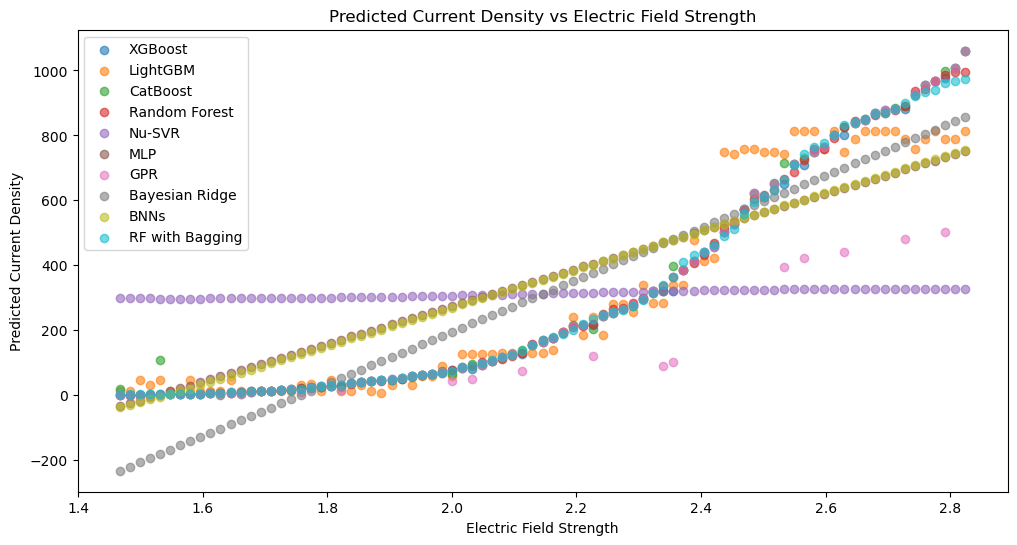

In [63]:
plt.figure(figsize=(12, 6))
for name in predictions:
    plt.scatter(data["Electric Field Strength"], predictions[name], label=name, alpha=0.6)
plt.xlabel("Electric Field Strength")
plt.ylabel("Predicted Current Density")
plt.legend()
plt.title("Predicted Current Density vs Electric Field Strength")
plt.show()

In [64]:
avg_deviation = {}
for name in predictions:
    avg_deviation[name] = np.mean(np.abs(predictions[name] - data["Current Density"]))

In [65]:
avg_deviation_df = pd.DataFrame(avg_deviation, index=["Average Deviation"]).T
print(avg_deviation_df)

                 Average Deviation
XGBoost                   2.485908
LightGBM                 50.563697
CatBoost                  4.534572
Random Forest             5.309434
Nu-SVR                  282.726111
MLP                     136.617113
GPR                      31.308407
Bayesian Ridge          108.037216
BNNs                    133.104516
RF with Bagging           6.798256
